# Calories Burned Prediction with Python

## Machine Learning Project on Calories Burned Prediction with Python

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import pymc3 as pm

In [3]:
# read the datasets
exercise = pd.read_csv('/content/exercise.csv')
calories = pd.read_csv('/content/calories.csv')
df = pd.merge(exercise, calories, on = 'User_ID')
df = df[df['Calories'] < 300]
df = df.reset_index()
df['Intercept'] = 1
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


Text(0.5, 1.0, 'Calories Burned vs Duration Of Exercise')

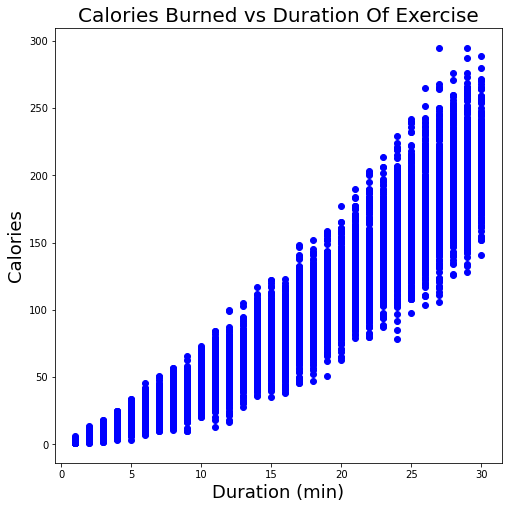

In [5]:
# visualize the datasets 
plt.figure(figsize = (8 , 8))
plt.plot(df['Duration'], df['Calories'], 'bo');
plt.xlabel('Duration (min)', size = 18);
plt.ylabel('Calories', size = 18);
plt.title('Calories Burned vs Duration Of Exercise', size = 20)

In [14]:
# create the features and a response 
X = df.loc[:, ['Intercept', 'Duration']]
y = df.loc[:, 'Calories']
# implement a linear regression algorithm without using any library
def linear_regression(X, y):
  _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
  return _coeffs
by_hand_coefs = linear_regression(X, y)
print('Intercept Calculated by hand: ', by_hand_coefs[0])
print('Slope Calculated by hand: ', by_hand_coefs[1])

ValueError: ignored